In [1]:
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import json
from pycocotools import mask as coco_mask
import cv2

In [2]:
# Validation set 
# Load ground truth segmentations
data_dir = "/data/healthy-ml/gobi1/data/CheXlocalize"

In [3]:
# Current CheXpert dataset is downsized. need to download original valid and test images 
img = Image.open("/data/healthy-ml/gobi1/data/CheXpert/val/patient64652/study1/view1_frontal.jpg")

In [4]:
img = cv2.cvtColor(np.float32(img), cv2.COLOR_GRAY2BGR) / 255.

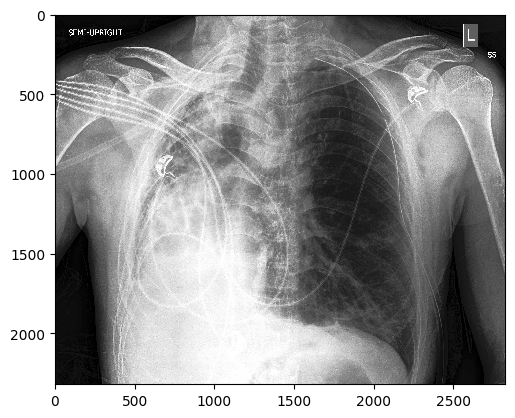

In [5]:
plt.figure()
plt.imshow(img)

In [6]:
with open("/data/healthy-ml/gobi1/data/CheXlocalize/gradcam_segmentations_val.json", "r") as f: 
    gradcam_seg = json.load(f)

In [7]:
with open("/data/healthy-ml/gobi1/data/CheXlocalize/gt_segmentations_val.json", "r") as f: 
    ground_truth_seg = json.load(f)

In [8]:
# ids = list(gradcam_seg.keys())
# conditions = list(gradcam_seg[ids[4]])

ids = list(ground_truth_seg.keys())

In [9]:
print(len(ids))
ids[0]

187


'patient64622_study1_view1_frontal'

In [10]:
# It's a contour -> need to run their script for generating segmentations from human annotations first 

ground_truth_seg[id][condition]

KeyError: <built-in function id>

In [ ]:
ground_truth_seg[id].keys()

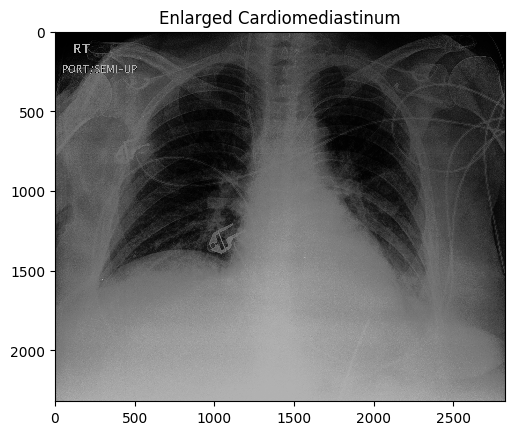

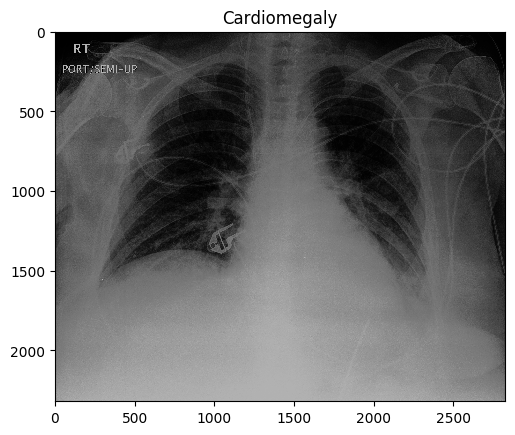

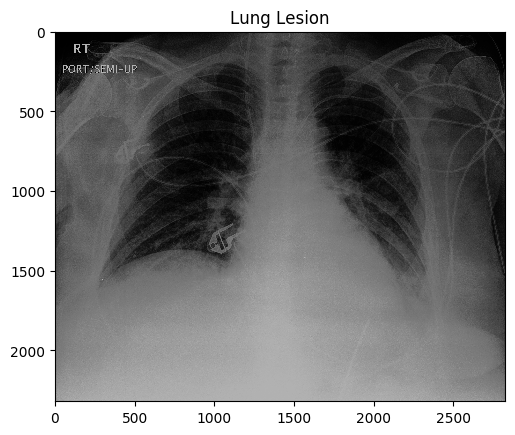

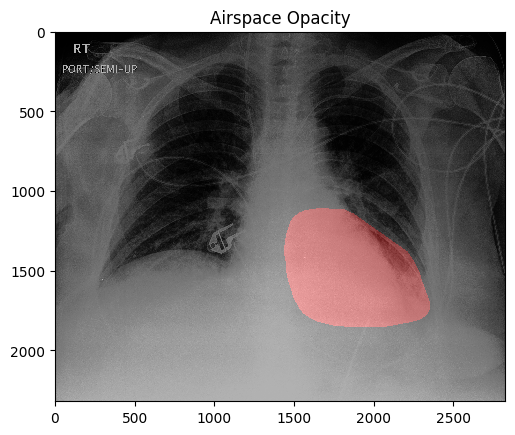

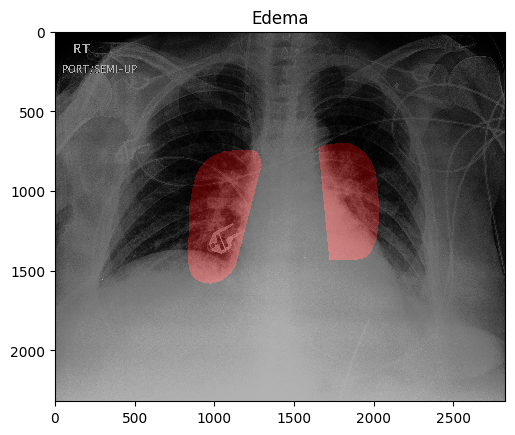

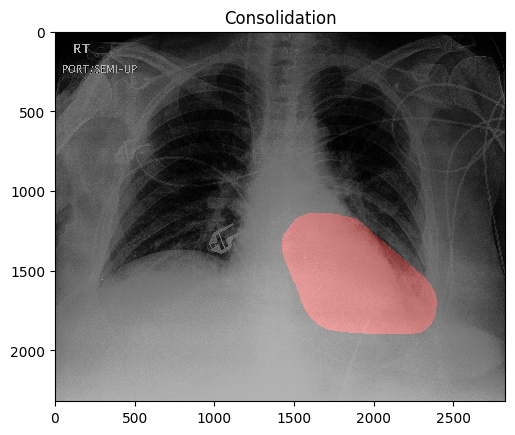

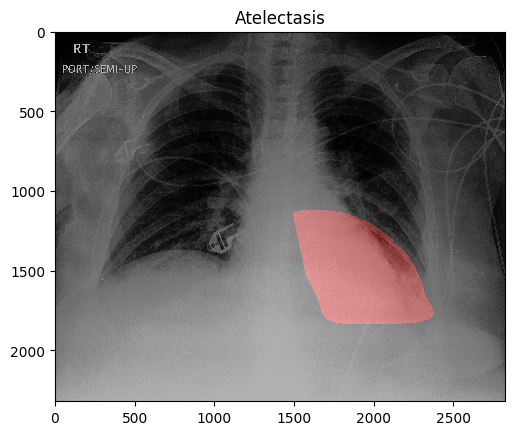

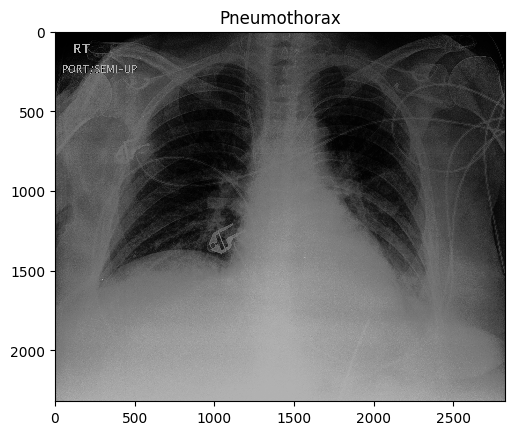

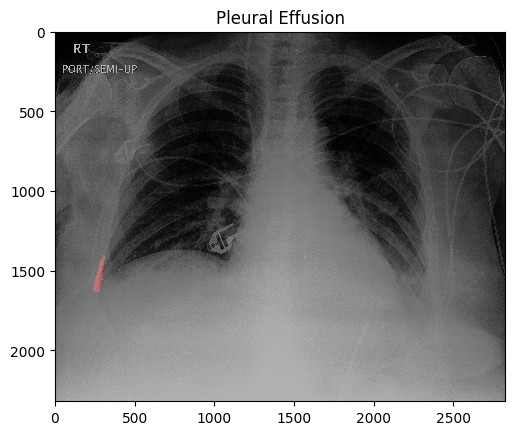

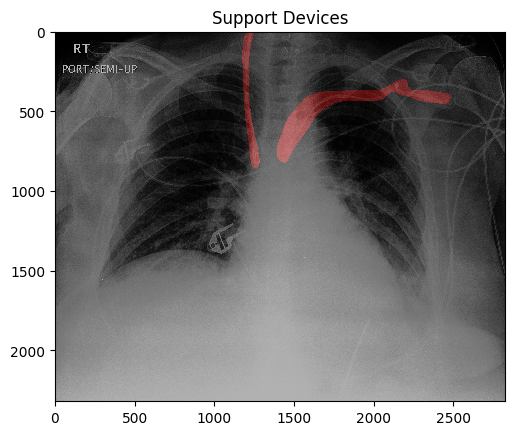

In [30]:
id = ids[23]

conditions = list(ground_truth_seg[id])

patient = id.split("_")[0]
study = id.split("_")[1] 
view = id.split("_")[-2] + "_" + id.split("_")[-1]

if os.path.isfile(f"/data/healthy-ml/gobi1/data/CheXpert/val/{patient}/{study}/{view}.jpg"): 
    img = Image.open(f"/data/healthy-ml/gobi1/data/CheXpert/val/{patient}/{study}/{view}.jpg")
# elif os.path.isfile(f"/data/healthy-ml/gobi1/data/CheXpert/test/{patient}/{study}/{view}.jpg"):
#     img = Image.open(f"/data/healthy-ml/gobi1/data/CheXpert/test/{patient}/{study}/{view}.jpg")
else: 
    raise Exception("Image not found in CheXpert!")
    
img = cv2.cvtColor(np.float32(img), cv2.COLOR_GRAY2BGR) / 255.

for condition in conditions: 
    # img_mask = coco_mask.decode(gradcam_seg[id][condition])
    img_mask = coco_mask.decode(ground_truth_seg[id][condition])
    height, width = img_mask.shape
    mask = np.zeros([height, width, 3], dtype = np.float32)
    mask[:, :, 0] = img_mask
    out = cv2.addWeighted(img, 0.7, mask, 0.3,0)
    plt.figure()
    plt.title(condition)
    plt.imshow(out, cmap='gray')

In [24]:
id = ids[11]
condition = "Support Devices"
img_mask = coco_mask.decode(ground_truth_seg[id][condition])
height, width = img_mask.shape
mask = np.zeros([height, width, 3], dtype = np.float32)
mask[:, :, 0] = img_mask
out = cv2.addWeighted(img, 0.7, mask, 0.3,0)
plt.figure()
plt.title(condition)
plt.imshow(out, cmap='gray')

error: OpenCV(4.3.0) /io/opencv/modules/core/src/arithm.cpp:666: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


In [123]:
img_gradcam_mask = coco_mask.decode(gradcam_seg['patient64652_study1_view1_frontal']['Support Devices'])

In [109]:
img_gradcam_mask.shape

(2320, 2828)

In [110]:
height, width = gradcam_seg['patient64652_study1_view1_frontal']['Support Devices']['size']

In [111]:
mask = np.zeros([height, width, 3], dtype = np.float32)
mask[:, :, 0] = img_gradcam_mask

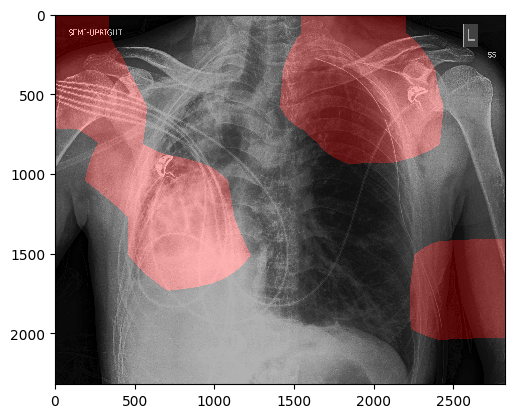

In [113]:
out = cv2.addWeighted(img, 0.7, mask, 0.3,0)
plt.figure()
plt.imshow(out, cmap='gray')